# K-Nearest Neighbor(KNN) Algorithm for Machine Learning

# importing libraries

In [13]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

# importing datasets

In [14]:
data_set = pd.read_csv('user_data.csv')
data_set.value_counts()

User ID   Gender  Age  EstimatedSalary  Purchased
15566689  Female  35   57000            0            1
15728773  Male    27   58000            0            1
15734312  Male    38   71000            0            1
15734161  Female  37   93000            1            1
15733973  Female  47   113000           1            1
                                                    ..
15654296  Female  50   20000            1            1
15654230  Female  55   130000           1            1
15652400  Female  38   50000            0            1
15651983  Male    34   112000           1            1
15815236  Female  45   131000           1            1
Name: count, Length: 400, dtype: int64

# Extracting Independent and dependent Variable

In [15]:
x = data_set.iloc[:, [2,3]].values
y = data_set.iloc[:, 4].values

# Splitting the Dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

# Fitting K-NN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

# Predicting the test set result

In [30]:
y_pred = classifier.predict(x_test)

# Visualizing the training set result

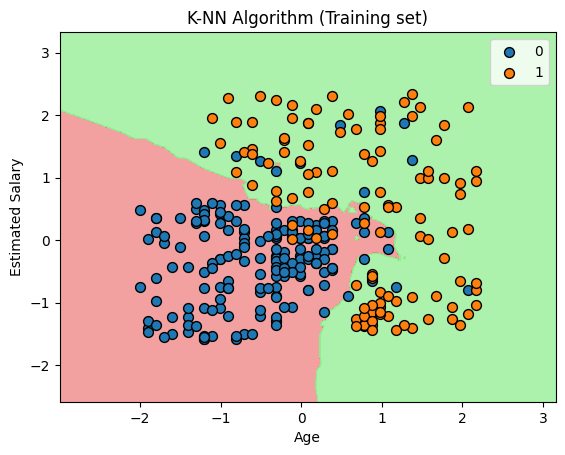

In [31]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['lightcoral', 'lightgreen']))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                edgecolor='k', marker='o', s=50, label=j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()


# Visualizing the test set result

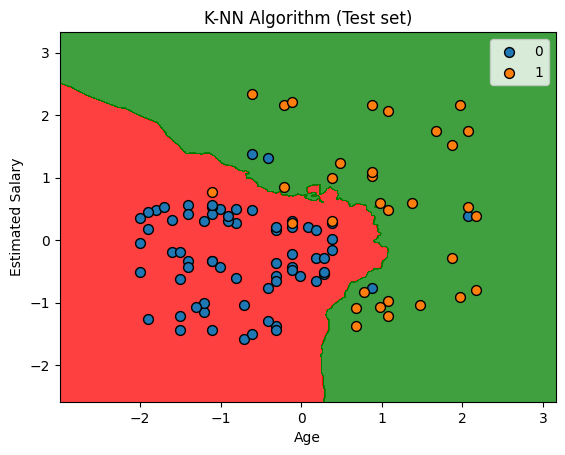

In [21]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['red', 'green']))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                edgecolor='k', marker='o', s=50, label=j)
mtp.title('K-NN Algorithm (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()


# evaluation metrics for the K-NN classifier

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')
# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')
# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')
from sklearn.metrics import r2_score, accuracy_score
# R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) score: {r2}')
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')


Precision: 0.8787878787878788
Recall: 0.90625
F1-Score: 0.8923076923076922
R-squared (R2) score: 0.6783088235294117
Accuracy score: 0.93
